In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import pytorch_lightning as pl

/Users/lucasmueller/anaconda/envs/pl_logger_contrib/lib/python3.8/site-packages/wandb/util.py:35: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import namedtuple, Mapping, Sequence
/Users/lucasmueller/anaconda/envs/pl_logger_contrib/lib/python3.8/site-packages/wandb/vendor/graphql-core-1.1/graphql/type/directives.py:55: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  assert isinstance(locations, collections.Iterable), 'Must provide locations for directive.'


In [2]:
def generate_figures():
    """Generator function that yields figures and step index"""
    for i in range(3):
        f, ax = plt.subplots()
        x = torch.linspace(0, 1, 100)
        y = i * x ** 2
        ax.plot(x.numpy(), y.numpy())
        ax.set_ylim(0, 2)
        
        yield f, i


/Users/lucasmueller/anaconda/envs/pl_logger_contrib/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# general stuff
tag = 'dummy_figure'

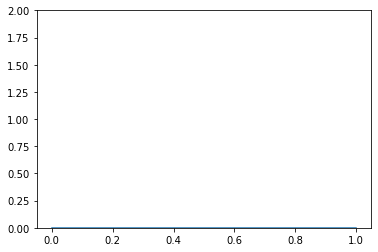

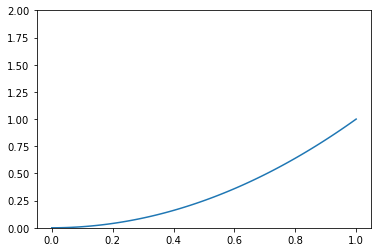

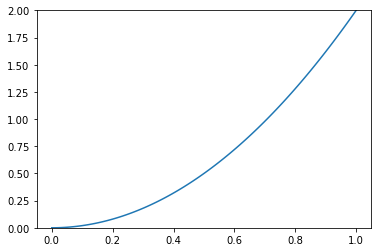

In [4]:
# native plotting
for f, i in generate_figures():
    plt.show()

In [5]:
# log figure in tensorboard
from torch.utils.tensorboard import SummaryWriter


tb = SummaryWriter('logs/tensorboard')

for f, i in generate_figures():
    tb.add_figure(tag, f, global_step=i)

/Users/lucasmueller/anaconda/envs/pl_logger_contrib/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/lucasmueller/anaconda/envs/pl_logger_contrib/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/haydnspass/general/3c5225c45a87440a896a561fe736f6ca

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/haydnspass/general/3c5225c45a87440a896a561fe736f6ca
COMET INFO:   Uploads [count]:
COMET INFO:     code                     : 1 (963 bytes)
COMET INFO:     environment details      : 1
COMET INFO:     figures [3]              : 3
COMET INFO:    

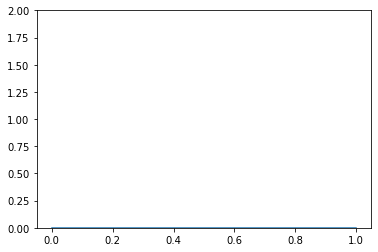

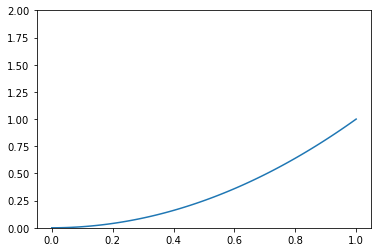

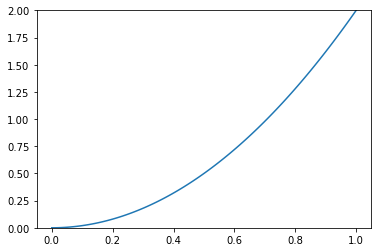

In [6]:
# log figure in comet
from comet_ml import Experiment

cml = Experiment()

for f, i in generate_figures():
    cml.log_figure(figure_name=tag, figure=f, overwrite=False, step=i)
    
cml.end()

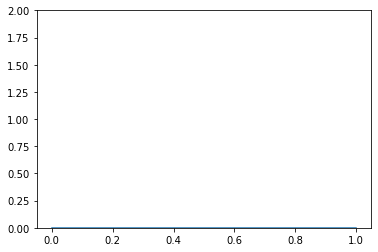

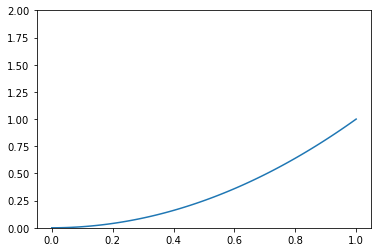

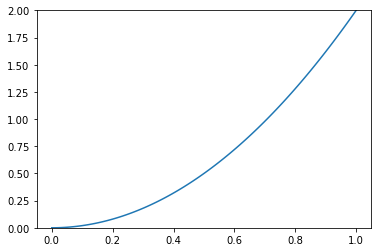

In [9]:
# log figure in mlflow
import mlflow

ml_artifact_path = '/Users/lucasmueller/Repositories/logger-collection/logs/mlflow'
ml_id = mlflow.create_experiment(artifact_location=ml_artifact_path)

for f, i in generate_figures():
    f_name = ml_artifact_path + f'/dummy_fig_step_{i}.png'
    f.savefig(f_name)
    mlflow.log_artifact(f_name)